# Analysis of Chess Grandmaster Zhigalko Sergei's lichess games

In [3]:
import pandas as pd
import numpy as np
import lichess.api
import lichess.pgn
import chess.pgn
from api_key import auth
from lichess.format import PGN, SINGLE_PGN, PYCHESS
import matplotlib.pyplot as plt
import tqdm

In [164]:
# games = lichess.api.user_games('Zhigalko_Sergei', max=1000, auth=auth, format=PYCHESS)


In [11]:
# some text splitting to use pychess's game output as a 2D numpy array
def end_game_heatmap(board, piece):
    tally = np.zeros((8, 8))
    rows = board.split("\n")
    for i in range(len(rows)):
        spaces = rows[i].split(' ')
        for j in range(len(spaces)):
            if spaces[j] == piece:
                tally[i, j] += 1.

    return tally

In [166]:
imageK = np.zeros((8,8))
imageQ = np.zeros((8,8))
imageN = np.zeros((8,8))
count = 0.
for game in games:
    if game.headers["White"] == "Zhigalko_Sergei":
        board = str(game.end().board())
        imageK += end_game_heatmap(board, "K")
        imageQ += end_game_heatmap(board, "Q")
        imageN += end_game_heatmap(board, "N")
        count += 1.
    

In [31]:
def plot_heatmap(count, heatmap):
    print(f"There were {int(count)} games considered ")
    plt.rcParams["figure.figsize"] = (10,10)
    Z1 = np.add.outer(np.arange(8), np.arange(8)) % 2  # chessboard
    extent = -.5, 7.5, -.5, 7.5
    im1 = plt.imshow(Z1, cmap=plt.cm.gray, interpolation='nearest', extent=extent)
    data = plt.imshow(heatmap/np.linalg.norm(heatmap), interpolation='lanczos', alpha=.96,cmap="cool")
    plt.xticks(np.arange(8), labels = ["a","b","c","d","e","f","g","h"])
    plt.yticks(np.arange(8), labels = np.flip(np.arange(8) + 1))
    plt.xlabel("file")
    plt.ylabel("rank")
    plt.title("Distribution of White's Knights \n Grandmaster Sergei")
    plt.colorbar(data)
    plt.show()

In [10]:
pgn = open("Zhigalko_Sergei.pgn")
count = 0
imageK = np.zeros((8,8))
imageQ = np.zeros((8,8))
imageN = np.zeros((8,8))
imageP = np.zeros((8,8))
for _ in tqdm.tqdm(pgn):
    game = chess.pgn.read_game(pgn)
    try:
        if (game.headers["White"] == "Zhigalko_Sergei") and (game.headers["Result"] == "1-0"):
            board = str(game.end().board())
            imageK += end_game_heatmap(board, "K")
            imageQ += end_game_heatmap(board, "Q")
            imageN += end_game_heatmap(board, "N")
            imageP += end_game_heatmap(board, "P")
            count += 1
    except:
        continue

20887it [01:45, 198.38it/s]


There were 7978 games considered 


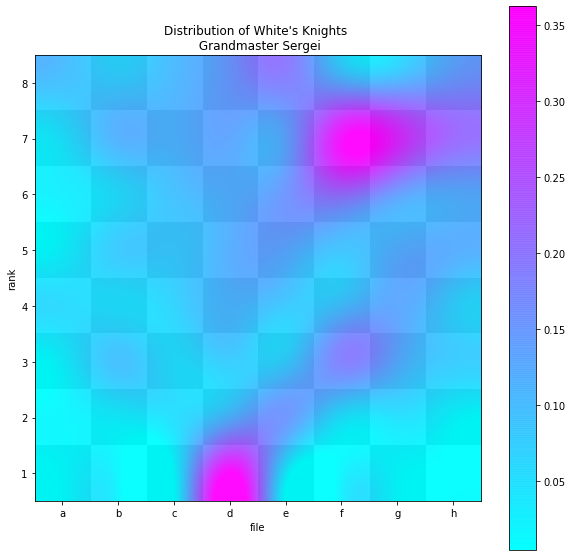

In [34]:
plot_heatmap(count, imageQ)